In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
print(df.describe(exclude=[object]))


           MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000 

In [8]:
print(df.describe(include=[object]))


              Date   Location WindGustDir WindDir9am WindDir3pm RainToday  \
count         8425       8425        7434       7596       8117      8185   
unique        3004         12          16         16         16         2   
top     2011-01-31  Melbourne           N          N         SE        No   
freq             5       1622         713        906        813      6195   

       RainTomorrow  
count          8186  
unique            2  
top              No  
freq           6195  


In [9]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [12]:
for each_feature in categorical_features:
   unique_values = len(df[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3004
Cardinality(no. of unique values) of Location are: 12
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [14]:
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [15]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
df[categorical_features].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [16]:
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [17]:
df[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [18]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
month               0
day                 0
dtype: int64

In [19]:
numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
for each_feature in numerical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [20]:
df[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
month            0
day              0
dtype: int64

In [21]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,...,1007.1,8.0,7.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,...,1007.8,7.0,7.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,...,1008.7,7.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,...,1012.8,7.0,7.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,4.0,0.0,E,31.0,SE,ENE,...,1020.3,7.0,7.0,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.3,0.0,4.0,0.0,NNW,22.0,SE,N,...,1019.1,7.0,7.0,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.9,0.0,4.0,0.0,N,37.0,SE,WNW,...,1016.8,7.0,7.0,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.0,0.0,4.0,0.0,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


# Outlier:

In [24]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

<AxesSubplot:>

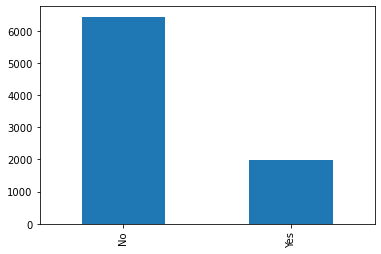

In [26]:
df['RainTomorrow'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

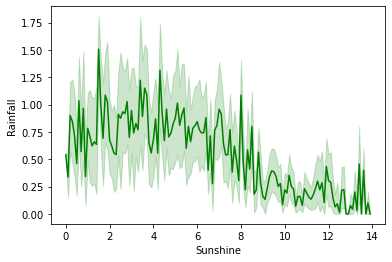

In [28]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='green')

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

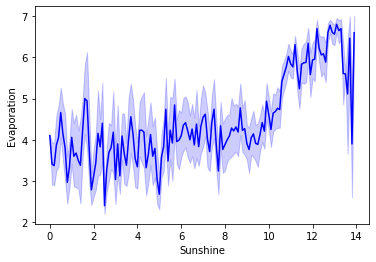

In [30]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='blue')

# Encoding:

In [33]:
def encode_data(feature_name):
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())

    for id in range(len(unique_values)):
        mapping_dict[unique_values[id]] = id
    return mapping_dict

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

df['Location'].replace(encode_data('Location'), inplace = True)

In [34]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,4.0,0.0,0,44.0,0,0,...,1007.1,8.0,7.0,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,4.0,0.0,1,44.0,1,1,...,1007.8,7.0,7.0,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,4.0,0.0,2,46.0,0,1,...,1008.7,7.0,2.0,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,4.0,0.0,3,24.0,2,2,...,1012.8,7.0,7.0,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,4.0,0.0,0,41.0,3,3,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,11,2.8,23.4,0.0,4.0,0.0,14,31.0,2,7,...,1020.3,7.0,7.0,10.1,22.4,0,0,2017,6,21
8421,11,3.6,25.3,0.0,4.0,0.0,4,22.0,2,12,...,1019.1,7.0,7.0,10.9,24.5,0,0,2017,6,22
8422,11,5.4,26.9,0.0,4.0,0.0,5,37.0,2,0,...,1016.8,7.0,7.0,12.5,26.1,0,0,2017,6,23
8423,11,7.8,27.0,0.0,4.0,0.0,12,28.0,5,12,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


# Visualization Techniques:

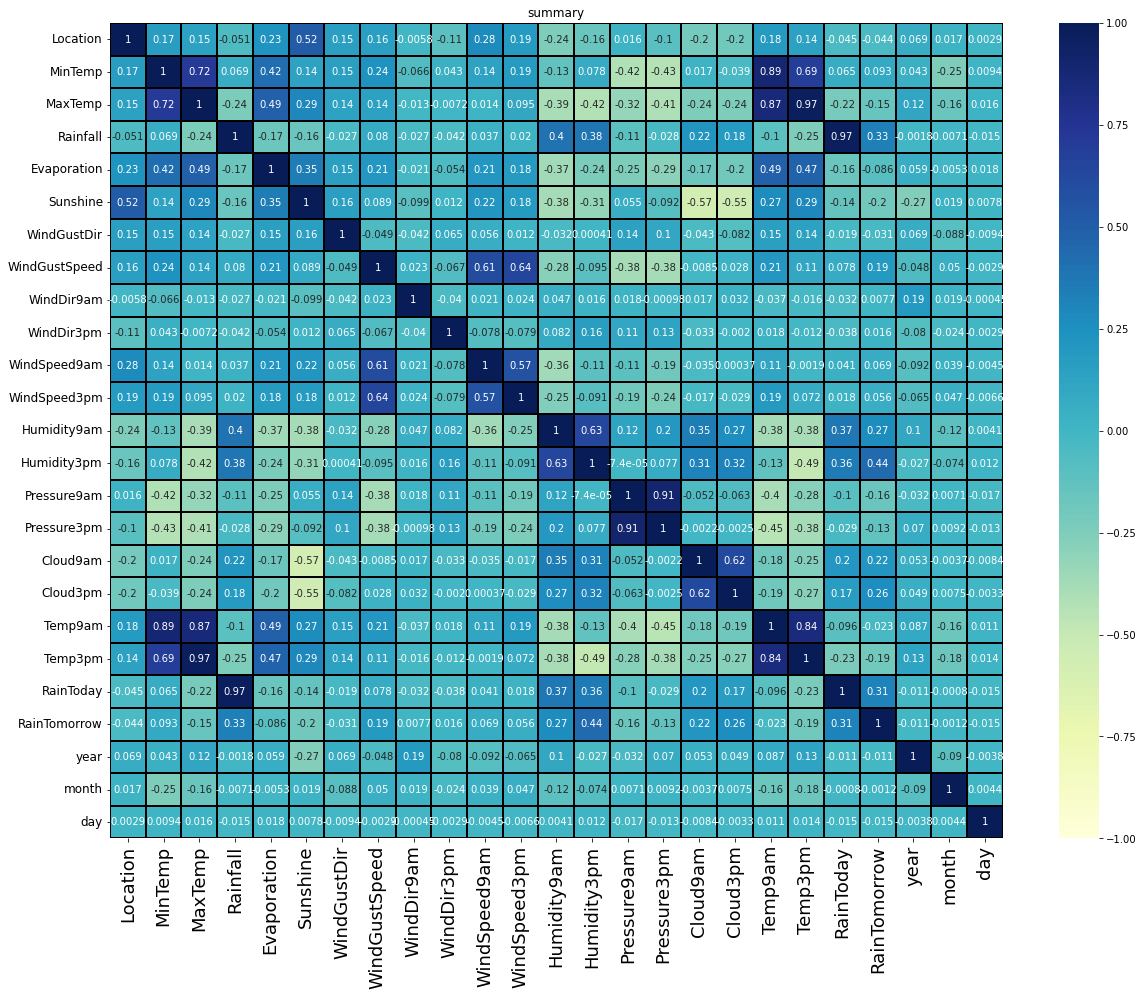

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",cmap="YlGnBu")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('summary')
plt.savefig('heatmap.png')
plt.show()

# Predictive Modelling:

In [37]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [39]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 6740
Length of Testing Data: 1685


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [43]:
log = LogisticRegression()
log.fit(x_train,y_train)
predlog = log.predict(x_test)

print(accuracy_score(y_test, predlog))
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

0.8172106824925816
[[1264   22]
 [ 286  113]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1286
           1       0.84      0.28      0.42       399

    accuracy                           0.82      1685
   macro avg       0.83      0.63      0.66      1685
weighted avg       0.82      0.82      0.78      1685



In [44]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.2593471810089021
[[  39 1247]
 [   1  398]]
              precision    recall  f1-score   support

           0       0.97      0.03      0.06      1286
           1       0.24      1.00      0.39       399

    accuracy                           0.26      1685
   macro avg       0.61      0.51      0.22      1685
weighted avg       0.80      0.26      0.14      1685



In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.7632047477744807
[[1286    0]
 [ 399    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      1286
           1       0.00      0.00      0.00       399

    accuracy                           0.76      1685
   macro avg       0.38      0.50      0.43      1685
weighted avg       0.58      0.76      0.66      1685



In [46]:
svc = SVC()
svc.fit(x_train,y_train)

predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7632047477744807
[[1286    0]
 [ 399    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      1286
           1       0.00      0.00      0.00       399

    accuracy                           0.76      1685
   macro avg       0.38      0.50      0.43      1685
weighted avg       0.58      0.76      0.66      1685



In [47]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.23679525222551928
[[   0 1286]
 [   0  399]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1286
           1       0.24      1.00      0.38       399

    accuracy                           0.24      1685
   macro avg       0.12      0.50      0.19      1685
weighted avg       0.06      0.24      0.09      1685



# CROSS-VALIDATION

In [49]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,x,y,cv=5).mean())

print(cross_val_score(log,x,y,cv=5).mean())

print(cross_val_score(dtc,x,y,cv=5).mean())

print(cross_val_score(svc,x,y,cv=5).mean())

print(cross_val_score(GB,x,y,cv=5).mean())

0.8470029673590505
0.8117507418397627
0.7721068249258161
0.7636795252225519
0.8059347181008902


# ROC Curve:

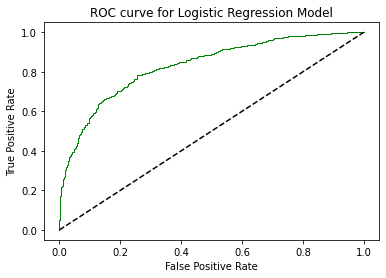

In [52]:
y_pred_logreg_probality  =log.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_probality[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

# HYPERPARAMETER TUNNING FOR THE MODEL WITH BEST SCORE

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [55]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [56]:
RainTomorrow =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
RainTomorrow.fit(x_train, y_train)
pred =RainTomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

28.18991097922849
